###Problem Statement

In this Analysis, we will study how the student exam performance is impacted by variable such as Gender, Ethnicity, Praparation etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.shape

(1000, 8)

In [6]:
### check null values
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
### check duplicates
df.duplicated().sum()

np.int64(0)

In [9]:
## check unique values in dataframe

df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
## check stats of the dataframe
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Exploring tha data

In [11]:
print("Categories in gender variable:  ", end=" ")
print(df['gender'].unique())

Categories in gender variable:   ['female' 'male']


In [12]:
print("Categories in race variable:  ", end=" ")
print(df['race_ethnicity'].unique())

Categories in race variable:   ['group B' 'group C' 'group A' 'group D' 'group E']


In [15]:
print("Categories in parential levelof education variable:  ",end=" ")
print(df['parental_level_of_education'].unique())

Categories in parential levelof education variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [16]:
print("Categories in lunch variable:  ", end=" ")
print(df['lunch'].unique())

Categories in lunch variable:   ['standard' 'free/reduced']


In [17]:
print("Categories in test preparation course variable:  ", end=" ")
print(df['test_preparation_course'].unique())

Categories in test preparation course variable:   ['none' 'completed']


In [23]:
num_feature = [feature for feature in df.columns if df[feature].dtype !='O']
cat_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f"we have {len(num_feature)} numerical features : {num_feature} ")
print(f"we have {len(cat_feature)} categorical features : {cat_feature}")

we have 3 numerical features : ['math_score', 'reading_score', 'writing_score'] 
we have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [30]:
# df.drop(['avg_score','total_score'],axis=1)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [31]:
### Add More column for average and score

df['total_score'] = df.math_score +df.reading_score + df.writing_score
df['avg_score']= df['total_score']/3

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [35]:

reading_full = df[df['reading_score'] == 100]['avg_score'].count()
writing_full = df[df['writing_score'] == 100]['avg_score'].count()
math_full = df[df['math_score'] == 100]['avg_score'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [39]:
reading_less_20 = df[df['reading_score'] <= 20]['avg_score'].count()
writing_less_20 = df[df['writing_score'] <= 20]['avg_score'].count()
math_less_20 = df[df['math_score'] <= 20]['avg_score'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


### Insights from the data we have studied
#### 1 The performance of students in math is below average
 #### 2 The performance of students in reading is above average

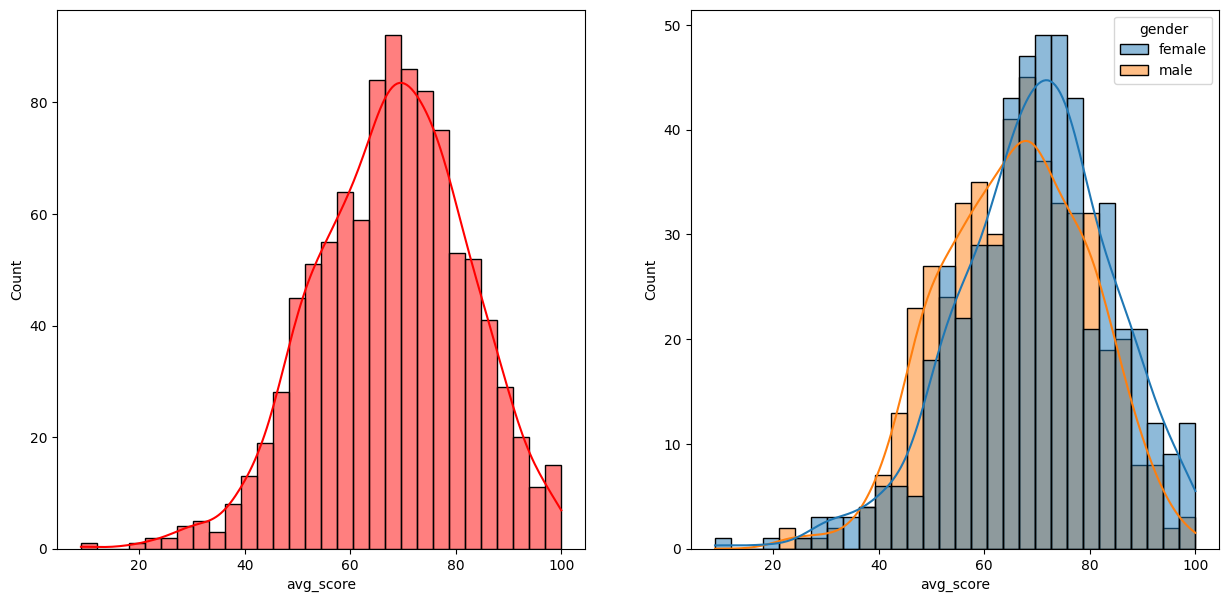

In [47]:
## hsotgram and kde

fig,axs = plt.subplots(1,2,figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='avg_score',bins=30,kde=True,color='r')
plt.subplot(122)
sns.histplot(data=df,x='avg_score',bins=30, kde=True,hue='gender')
plt.show()

## Female students tend to perform better than male students

### We can perform more EDA as required by the project